### 1. Load the dataset into python environment

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [3]:
df.set_index(['PassengerId'], inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4. Fill in all the missing values present in all the columns in the dataset

In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Density'>

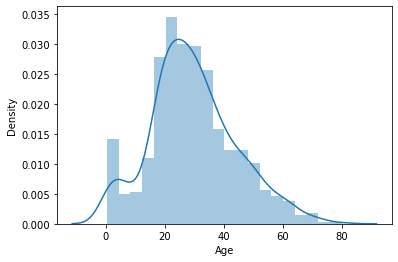

In [8]:
#plotting the distribution of the age
sns.distplot(df.Age)

In [9]:
# fill null values in numerical column, here df[Age] with median as it is skewed
df['Age'].median()

28.0

In [10]:
df['Age'].fillna(round(df['Age'].median()), inplace = True)

In [11]:
# to fill null values in a categorical column, check for the mode
df['Embarked'].mode()

0    S
dtype: object

In [12]:
# fill null values in categorical column, here df[Embarked] with the mode
df['Embarked'].fillna(df['Embarked'].mode().values[0], inplace =True)

In [13]:
# Since out of 891 counts, 687 counts of Cabin feature is missing, we drop that particular column.
df1=df.drop(['Cabin'],axis=1)
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


### 5. Check and handle outliers in at least 3 columns in the dataset

### a) Fare

<AxesSubplot:xlabel='Fare'>

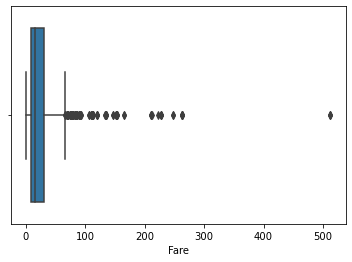

In [16]:
sns.boxplot(df1['Fare'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

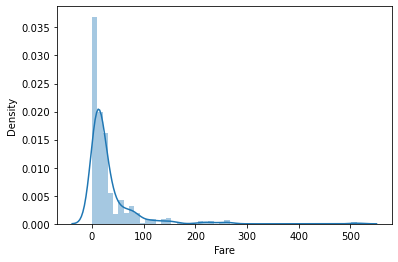

In [17]:
sns.distplot(df1['Fare'])

In [18]:
# Identifying the outliers
Q1 = np.percentile(df1['Fare'],25,interpolation='midpoint')
Q3 = np.percentile(df1['Fare'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in df1['Fare']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)

In [19]:
outlier_data = df1['Fare'] > up_limit
df1.loc[outlier_data]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,28.0,1,0,PC 17569,146.5208,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,28.0,1,0,17453,89.1042,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,S


In [20]:
# Applying StandardScaler to handle the outliers in feature Fare
from sklearn.preprocessing import StandardScaler
Fare=df1['Fare']
Fare=Fare.values.reshape(-1,1)
# create a scaler object
std_scaler = StandardScaler()
# fit and transform the data
scaled_Fare = pd.DataFrame(std_scaler.fit_transform(Fare))
df1['Fare']=scaled_Fare
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.786845,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,-0.488854,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.420730,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,-0.486337,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.478116,S


### b) Age

<AxesSubplot:xlabel='Age'>

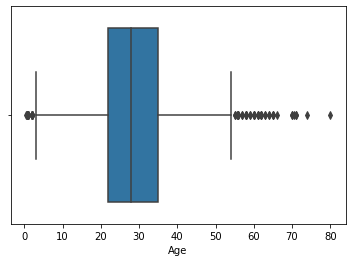

In [21]:
sns.boxplot(df1['Age'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

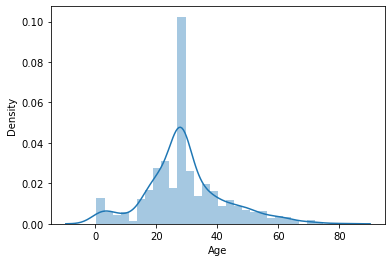

In [22]:
sns.distplot(df1['Age'])

In [23]:
# Identifying the outliers
Q1 = np.percentile(df1['Age'],25,interpolation='midpoint')
Q3 = np.percentile(df1['Age'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in df1['Age']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)        

In [24]:
outlier_data_1 = df1['Age'] > up_limit
df1.loc[outlier_data_1]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,-0.486337,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,-0.061999,S
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,1.006062,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,0.066360,C
95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,-0.486337,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,0.627278,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,-0.225593,Q
153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,-0.356469,S
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,-0.061999,S


Replacing the outliers with Median value, as the feature is skewed.

In [25]:
median=df1['Age'].median()

In [26]:
df1['Age'] = np.where(df1["Age"] >up_limit, median,df1['Age'])
df1['Age'] = np.where(df1["Age"] <low_limit, median,df1['Age'])
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.786845,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,-0.488854,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.420730,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,-0.486337,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,-0.478116,S


### c) SibSp

<AxesSubplot:xlabel='SibSp'>

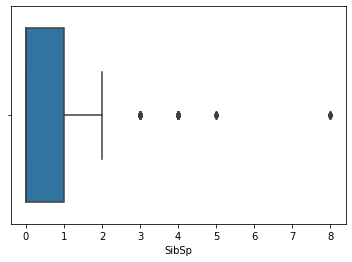

In [27]:
sns.boxplot(df1['SibSp'])

In [28]:
# Identifying the outliers
Q1 = np.percentile(df1['SibSp'],25,interpolation='midpoint')
Q3 = np.percentile(df1['SibSp'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in df1['SibSp']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x) 

In [29]:
outlier_data_2 = df1['SibSp'] > up_limit
df1.loc[outlier_data_2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,28.0,3,1,349909,-0.424256,S
17,0,3,"Rice, Master. Eugene",male,28.0,4,1,382652,-0.386671,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,-0.016444,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,-0.489776,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,-0.491371,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,-0.502864,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,-0.090272,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,-0.474005,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,0.831478,S


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

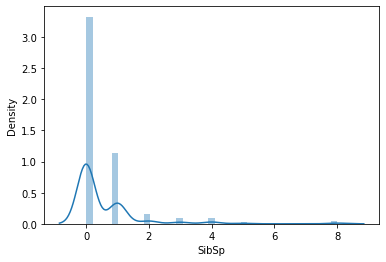

In [30]:
sns.distplot(df1['SibSp'])

Applying the MinMaxScaler to handle the outliers in feature SibSp.

In [31]:
# Applying StandardScaler to handle the outliers in feature SibSp
from sklearn.preprocessing import StandardScaler

SibSp=df1['SibSp']
SibSp=SibSp.values.reshape(-1,1)
# create a scaler object
std_scaler = StandardScaler()
# fit and transform the data
scaled_SibSp = pd.DataFrame(std_scaler.fit_transform(SibSp))
df1['SibSp']=scaled_SibSp
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,0.432793,0,A/5 21171,0.786845,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,-0.474545,0,PC 17599,-0.488854,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.432793,0,STON/O2. 3101282,0.420730,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,-0.474545,0,113803,-0.486337,S
5,0,3,"Allen, Mr. William Henry",male,35.0,-0.474545,0,373450,-0.478116,S


### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [32]:
df1[['Survived']].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [33]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
survived_matrix=df1['Survived'].values.reshape(-1,1)
df_norm = pd.DataFrame(scaler.fit_transform(survived_matrix))
df1['Survived']=df_norm
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,1.0,3,"Braund, Mr. Owen Harris",male,22.0,0.432793,0,A/5 21171,0.786845,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,-0.474545,0,PC 17599,-0.488854,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.432793,0,STON/O2. 3101282,0.420730,S
4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,-0.474545,0,113803,-0.486337,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,-0.474545,0,373450,-0.478116,S


In [35]:
# Define the dependent and independent variables 
y=df['Survived']
X=df.drop(['Survived', 'Name', 'Sex', 'Ticket','Cabin', 'Embarked'], axis=1)

In [36]:
# Import train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [37]:
# Build Linear Regression model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print(y_test)

PassengerId
710    1
440    0
841    0
721    1
40     1
      ..
434    0
774    0
26     1
85     1
11     1
Name: Survived, Length: 179, dtype: int64


In [39]:
#Get the coefficient and intercept value of the model 
print("The model coefficient is:", model.coef_)
print("The model intercept value is:", model.intercept_)

# To evaluate the model using Mean squared error and R squared value
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predictions))

from sklearn.metrics import r2_score
print('R squared value is:',r2_score(y_test,predictions))

# Comment Findings
print("This model is a best fit for our data, as the MSE value is very small and r2_ score value is small.")

The model coefficient is: [-0.19102497 -0.00649103 -0.04455793  0.04802101  0.00078265]
The model intercept value is: 0.9920113851439349
MSE is: 0.1869278524055185
R squared value is: 0.2291691996235239
This model is a best fit for our data, as the MSE value is very small and r2_ score value is small.
